<h2 style="color: #FF4500">Capítulo 11</h2>
<h3 style="color: #8B4513">Desplazamiento y desplazamiento de datos</h3>

In [46]:
# Desplazar o retrasar valores en un marco de datos

import pandas as pd

df = pd.DataFrame({'eggs': [1,2,4,8,], 'chickens': [0,1,2,4,]})
df


,eggs,chickens
0,1,0
1,2,1
2,4,2
3,8,4


In [47]:
df.shift() # si no se especifica el valor predermininado a mover es 1

,eggs,chickens
0,NaN,NaN
1,1.0,0.0
2,2.0,1.0
3,4.0,2.0


In [48]:
df.shift(-2)


,eggs,chickens
0,4.0,2.0
1,8.0,4.0
2,NaN,NaN
3,NaN,NaN


In [49]:
df['eggs'].shift(1) - df['chickens']


0    NaN
1    0.0
2    0.0
3    0.0
dtype: float64

<h2 style="color: #FF4500">Capítulo 12</h2>
<h3 style="color: #8B4513">Fusionar, Unir y Concatenar</h3>

<h3 style="color: #FFA500">Fusionar dos dataframe</h3>

In [50]:
df1 = pd.DataFrame({'x': [1, 2, 3], 'y': ['a', 'b', 'c']})
df2 = pd.DataFrame({'y': ['b', 'c', 'd'], 'z': [4, 5, 6]})
df1

,x,y
0,1,a
1,2,b
2,3,c


In [51]:
df2

,y,z
0,b,4
1,c,5
2,d,6


In [52]:
#Unir INTERNAMENTE
df1.merge(df2) # by default, it does an inner join on the common column(s)

,x,y,z
0,2,b,4
1,3,c,5


In [53]:
#union Externa
df1.merge(df2, how='outer')


,x,y,z
0,1.0,a,NaN
1,2.0,b,4.0
2,3.0,c,5.0
3,NaN,d,6.0


In [54]:
#unirse a la izquierda
df1.merge(df2, how='left')

,x,y,z
0,1,a,NaN
1,2,b,4.0
2,3,c,5.0


In [55]:
#unir a la derecha
df1.merge(df2, how='right')

,x,y,z
0,2.0,b,4
1,3.0,c,5
2,NaN,d,6


<h3 style="color: #FFA500">Fusionar múltiples dataframe</h3>

In [56]:
df5 = pd.DataFrame({'col1':[211,212,213], 'col2': [221,222,223]})
df3 = pd.DataFrame({'col1':[11,12,13], 'col2': [21,22,23]})
df4 = pd.DataFrame({'col1':[111,112,113], 'col2': [121,122,123]})

In [57]:
df3

,col1,col2
0,11,21
1,12,22
2,13,23


In [58]:
df4

,col1,col2
0,111,121
1,112,122
2,113,123


In [59]:
df5

,col1,col2
0,211,221
1,212,222
2,213,223


In [61]:
#VERTICALMENTE- agregar filas
pd.concat([df3,df4,df5], ignore_index=True)

,col1,col2
0,11,21
1,12,22
2,13,23
3,111,121
4,112,122
5,113,123
6,211,221
7,212,222
8,213,223


In [62]:
#HORIZONTALMENTE - alineación por índice
pd.concat([df3,df4,df5], axis=1)

,col1,col2,col1,col2,col1,col2
0,11,21,111,121,211,221
1,12,22,112,122,212,222
2,13,23,113,123,213,223


In [69]:
#join 
#Piense en join como si quisiera combinarlos a los marcos de datos en función de sus índices
#respectivos. Si hay columnas superpuestas, join querrá que agregue un sufijo al nombre de la
#columna superpuesta de el marco de datos de la izquierda. Nuestros dos marcos de datos tienen
#un nombre de columna superpuesto A

In [70]:
left = pd.DataFrame([['a', 1], ['b', 2]], list('XY'), list('AB'))
left


,A,B
X,a,1
Y,b,2


In [71]:
right = pd.DataFrame([['a', 3], ['b', 4]], list('XY'), list('AC'))
right

,A,C
X,a,3
Y,b,4


In [72]:
left.join(right, lsuffix='_')

,A_,B,A,C
X,a,1,a,3
Y,b,2,b,4


<h2 style="color: #FF4500">Capítulo 13</h2>
<h3 style="color: #8B4513">Gotchas de Pandas</h3>

<h3 style="color: #FFA500">Detectando valores perdidos con np.nan
</h3>

In [ ]:
df=pd.DataFrame({'col':[1,np.nan]})
df==np.nan

Obtendrás el siguiente resultado:
col
0 False
1 False



Esto se debe a que comparar el valor faltante con cualquier cosa da como resultado un Falso; en
lugar de esto, debe usar

df=pd.DataFrame({'col':[1,np.nan]})
df.isnull()

lo que resulta en:
col
0 False
1 True

<h3 style="color: #FFA500">Integer y NA
</h3>

<p style="text-aling:justify"> Las pandas no admiten la falta de atributos de tipo entero. 
En este caso, solo debes usar float en lugar de enteros o establecer el tipo de objeto.</p>

<h3 style="color: #FFA500">Alineación automática de datos (comportamiento indexado)
</h3>

In [89]:
#Si desea agregar una serie de valores [1,2] a la columna de dataframe df, obtendrá NaNs

import pandas as pd

series=pd.Series([1,2])
df=pd.DataFrame(index=[3,4])
df['col']=series
df
 

,col
3,NaN
4,NaN


In [90]:
#porque la configuración de una nueva columna alinea automáticamente los datos por el índice, y
#sus valores 1 y 2 obtendrían los índices 0 y 1, y no 3 y 4 como en su marco de datos:

df=pd.DataFrame(index=[1,2])
df['col']=series
df

,col
1,2.0
2,NaN


In [91]:
#Si desea ignorar el índice, debe configurar los valores al final

df['col']=series.values
df

,col
1,1
2,2


<h2 style="color: #FF4500">Capítulo 14</h2>
<h3 style="color: #8B4513">Gráficos y visualizaciones</h3>

<h3 style="color: #FFA500">Linea Plop
</h3>

<AxesSubplot:>

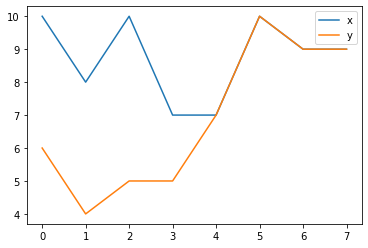

In [96]:
df = pd.DataFrame({'x': [10, 8, 10, 7, 7, 10, 9, 9],
 'y': [6, 4, 5, 5, 7, 10, 9, 9]})
df.plot()

<AxesSubplot:>

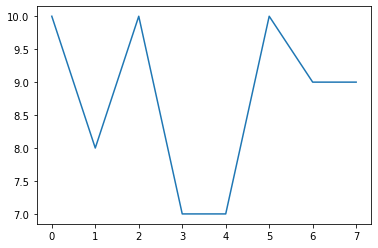

In [98]:
#llamar al mismo método para un objeto Serie para trazar un subconjunto del Marco de datos:
df['x'].plot()


<h3 style="color: #FFA500">Gráfico de Barras
</h3>

<AxesSubplot:>

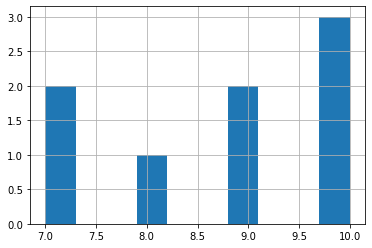

In [99]:
#explorar la distribución de los datos, se puede utilizar el método hist() .
df['x'].hist()

<h3 style="color: #FFA500">Método general para trazar parcela
</h3>

<AxesSubplot:ylabel='x'>

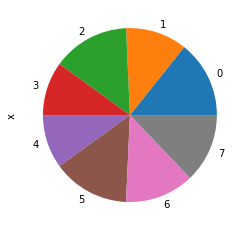

In [100]:
df['x'].plot(kind='pie')


<AxesSubplot:ylabel='x'>

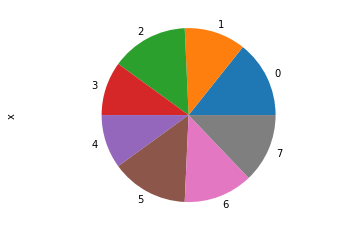

In [102]:
#En muchos entornos, el gráfico circular saldrá un óvalo. Para hacer un círculo, usa lo siguiente:

from matplotlib import pyplot
pyplot.axis('equal')
df['x'].plot(kind='pie')